# Loan Scoring Assignment

Author : Rahulptl1997@gmail.com <br>
Date : 20th Feb 2023

<p>
    Description : 
    X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
</p>

## Steps 

1. Data import
2. Initial Visualizaion/Exploration
3. Basic Data Cleaning
4. EDA
    1. Univariate
    2. Bivariate
5. Data Cleaning and Standardisation
6. pandas dummies
7. train test split
8. Random Scan with LR
9. Grid Scan with LR
10. Cross Validation
11. Precision, recall, roc, auc
12. evaluate on test data


## Libraries to import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

## Data Load

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Replacing space with underscore and to lower
df = df.rename(columns=lambda x: x.replace(' ', '_').lower())

## Data Exploration

In [4]:
# Shape of data
df.shape

(9240, 37)

In [5]:
# Null value analysis
df.isnull().sum()*100/df.shape[0]

prospect_id                                       0.000000
lead_number                                       0.000000
lead_origin                                       0.000000
lead_source                                       0.389610
do_not_email                                      0.000000
do_not_call                                       0.000000
converted                                         0.000000
totalvisits                                       1.482684
total_time_spent_on_website                       0.000000
page_views_per_visit                              1.482684
last_activity                                     1.114719
country                                          26.634199
specialization                                   15.562771
how_did_you_hear_about_x_education               23.885281
what_is_your_current_occupation                  29.112554
what_matters_most_to_you_in_choosing_a_course    29.318182
search                                            0.0000

In [6]:
# Dropping columns with more than 20% null data
columns_to_drop = df.columns[df.isnull().sum()*100/df.shape[0] > 40]
df = df.drop(columns=columns_to_drop)
df.shape

(9240, 32)

In [7]:
# Null value analysis
df.isnull().sum()*100/df.shape[0]

prospect_id                                       0.000000
lead_number                                       0.000000
lead_origin                                       0.000000
lead_source                                       0.389610
do_not_email                                      0.000000
do_not_call                                       0.000000
converted                                         0.000000
totalvisits                                       1.482684
total_time_spent_on_website                       0.000000
page_views_per_visit                              1.482684
last_activity                                     1.114719
country                                          26.634199
specialization                                   15.562771
how_did_you_hear_about_x_education               23.885281
what_is_your_current_occupation                  29.112554
what_matters_most_to_you_in_choosing_a_course    29.318182
search                                            0.0000

## Analysing columns with null values

In [8]:
# what_matters_most_to_you_in_choosing_a_course    
df.what_matters_most_to_you_in_choosing_a_course.value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: what_matters_most_to_you_in_choosing_a_course, dtype: int64

In [9]:
# Defaulting what_matters_most_to_you_in_choosing_a_course to Other
df.what_matters_most_to_you_in_choosing_a_course = df.what_matters_most_to_you_in_choosing_a_course.fillna('Others')

In [10]:
# what_is_your_current_occupation
df.what_is_your_current_occupation.value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: what_is_your_current_occupation, dtype: int64

In [11]:
# Defaulting what_is_your_current_occupation to Other
df.what_is_your_current_occupation = df.what_is_your_current_occupation.fillna('Unemployed')

In [12]:
df.country.value_counts(normalize=True).head()

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
Name: country, dtype: float64

In [13]:
# Filling NA values with INDIA
df.country =  df.country.fillna("India")

In [14]:
# Analysing specialization
df.specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

In [15]:
# Replacing Select with Unknown and filling NA with unknown
df.specialization = df.specialization.replace('Select','Unkown').fillna('Unknown')

In [16]:
# Analysing Tags
df.tags.value_counts(normalize=True).head()

Will revert after reading the email    0.351962
Ringing                                0.204349
Interested in other courses            0.087141
Already a student                      0.078988
Closed by Horizzon                     0.060812
Name: tags, dtype: float64

In [17]:
# Replacing Select with Unknown and filling NA with unknown
df.tags = df.tags.fillna('Unknown')

In [18]:
# Analysing Lead Profile
df.lead_profile.value_counts(normalize=True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: lead_profile, dtype: float64

In [19]:
# Replacing lead_profile with Unknown and filling NA with unknown
df.lead_profile = df.lead_profile.replace('Select','Unkown').fillna('Unknown')

In [20]:
# Analysing City
df.city.value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: city, dtype: float64

In [21]:
# Replacing city with Unknown and filling NA with unknown
df.city = df.city.replace('Select','Unkown').fillna('Unknown')

In [22]:
# Analysing how_did_you_hear_about_x_education
df.how_did_you_hear_about_x_education.value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: how_did_you_hear_about_x_education, dtype: float64

In [23]:
# Replacing how_did_you_hear_about_x_education with Unknown and filling NA with unknown
df.how_did_you_hear_about_x_education = df.how_did_you_hear_about_x_education.replace('Select','Other').fillna('Other')

In [24]:
# Analysing last_activity
df.last_activity.value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: last_activity, dtype: float64

In [25]:
# Replacing last_activity filling NA with unknown
df.last_activity = df.last_activity.fillna('Unknown')

In [26]:
# Analysing lead_source
df.lead_source.value_counts(normalize=True).head()

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Name: lead_source, dtype: float64

In [27]:
# Replacing lead_source filling NA with unknown
df.lead_source = df.lead_source.fillna('Unknown')

In [28]:
# Analysing totalvisits
df.totalvisits.describe([0.90,.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
50%         3.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: totalvisits, dtype: float64

In [29]:
# Filling totalvisits with Median Value
df.totalvisits = df.totalvisits.fillna(df.totalvisits.quantile(0.5))

In [30]:
# Analysing page_views_per_visit
df.page_views_per_visit.describe([0.90,.99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
50%         2.000000
90%         5.000000
99%         9.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [31]:
# Filling totalvisits with Median Value
df.page_views_per_visit = df.page_views_per_visit.fillna(df.totalvisits.quantile(0.5))

In [32]:
# Data types
df = df.convert_dtypes(infer_objects=True)
df.dtypes

prospect_id                                       string
lead_number                                        Int64
lead_origin                                       string
lead_source                                       string
do_not_email                                      string
do_not_call                                       string
converted                                          Int64
totalvisits                                        Int64
total_time_spent_on_website                        Int64
page_views_per_visit                             Float64
last_activity                                     string
country                                           string
specialization                                    string
how_did_you_hear_about_x_education                string
what_is_your_current_occupation                   string
what_matters_most_to_you_in_choosing_a_course     string
search                                            string
magazine                       

In [33]:
# Describing data
df.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.90,.99])

,lead_number,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.372267
std,23405.995698,0.486714,4.819024,548.021466,2.146715
min,579533.000000,0.000000,0.000000,0.000000,0.000000
1%,580317.120000,0.000000,0.000000,0.000000,0.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000


In [34]:
# Removing Total Visits > 251 or Page Views per visit
rows_to_drop = df.query('totalvisits > 17 or page_views_per_visit>9', engine='python').index
df = df.drop(rows_to_drop)
df.shape

(9090, 32)

In [35]:
# Analysing Categorical Data
freq_dist_for_cat = df.describe(exclude=np.number).loc['freq',:]
freq_dist_for_cat*100/df.shape[0]

prospect_id                                       0.011001
lead_origin                                      52.464246
lead_source                                       31.19912
do_not_email                                     92.222222
do_not_call                                      99.977998
last_activity                                    37.293729
country                                          96.886689
specialization                                   21.232123
how_did_you_hear_about_x_education               80.440044
what_is_your_current_occupation                  89.746975
what_matters_most_to_you_in_choosing_a_course    70.616062
search                                           99.856986
magazine                                             100.0
newspaper_article                                99.988999
x_education_forums                                   100.0
newspaper                                        99.988999
digital_advertisement                            99.9669

In [36]:
# Dropping columns where the column has only 1 type of value for category
columns_to_drop = freq_dist_for_cat[(freq_dist_for_cat*100/df.shape[0])>95].index
df = df.drop(columns=columns_to_drop,errors='ignore')
df.shape

(9090, 19)

In [37]:
# Standarising Cat Data
cat_columns = df.select_dtypes('string').columns
#cat_columns = ['lead_origin','lead_source','last_activity','a_free_copy_of_mastering_the_interview','last_notable_activity']
df[cat_columns] = df[cat_columns].apply(lambda x : x.str.title()).copy()

## Univariate Analysis

In [38]:
df.dtypes

prospect_id                                       string
lead_number                                        Int64
lead_origin                                       string
lead_source                                       string
do_not_email                                      string
converted                                          Int64
totalvisits                                        Int64
total_time_spent_on_website                        Int64
page_views_per_visit                             Float64
last_activity                                     string
specialization                                    string
how_did_you_hear_about_x_education                string
what_is_your_current_occupation                   string
what_matters_most_to_you_in_choosing_a_course     string
tags                                              string
lead_profile                                      string
city                                              string
a_free_copy_of_mastering_the_in

In [39]:
def analyse_cat_column_with_converted_column(column:str, values_limit:int):
    mean_conversion_rate = df.converted.mean()
    df_temp = df.copy()
    values_to_combine = df_temp[column].value_counts()[df_temp[column].value_counts()<values_limit].index
    df_temp[column] = df_temp[column].apply(lambda x : 'Others' if x in values_to_combine else x)
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    sns.barplot(x=df_temp.converted,y=df_temp[column],ax=ax[0] )
    ax[0].axvline(mean_conversion_rate)
    sns.countplot(y=df_temp[column], ax=ax[1],orient='h' )
    fig.tight_layout()
    plt.show()

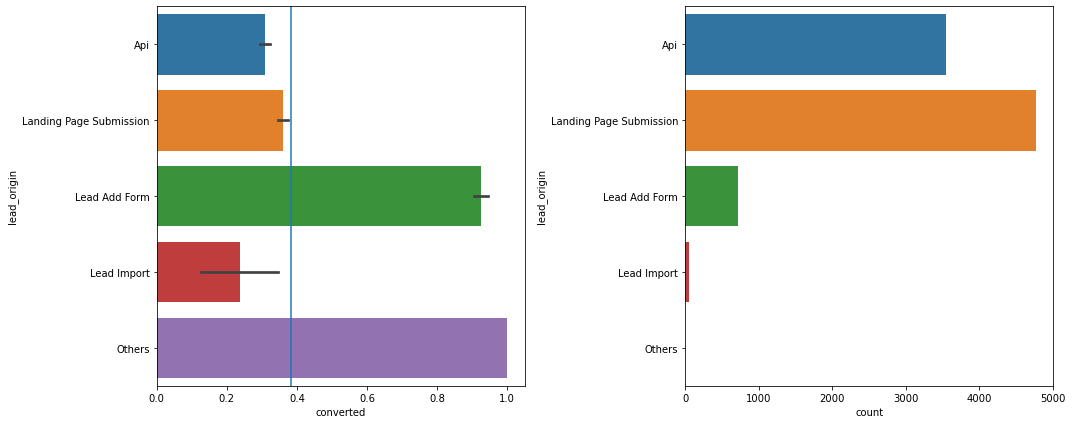

In [40]:
analyse_cat_column_with_converted_column('lead_origin',10)

1. "Lead Add Form" is a very good indicator of being converted 

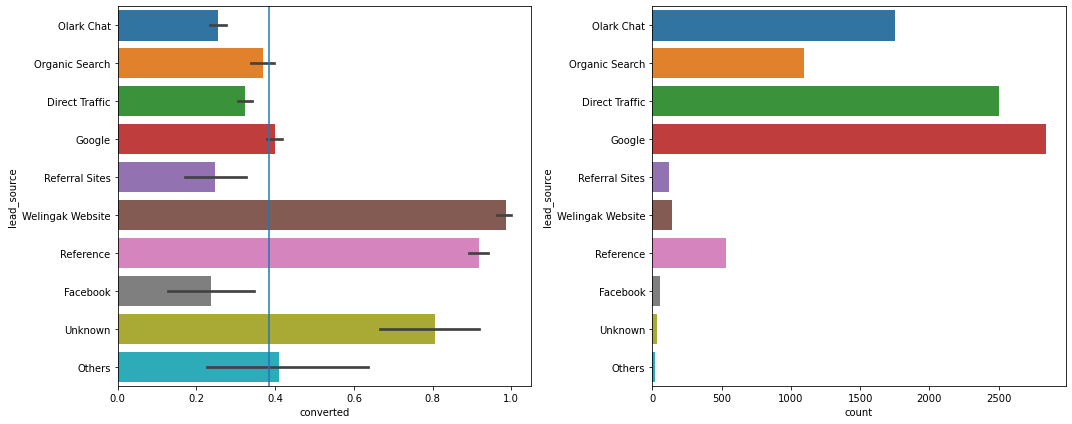

In [41]:
analyse_cat_column_with_converted_column('lead_source',10)

1. Google is performing slightly better than average
2. Referrals is a very good indicator 
3. Wellingak website although has low count, but still is a very good indicator

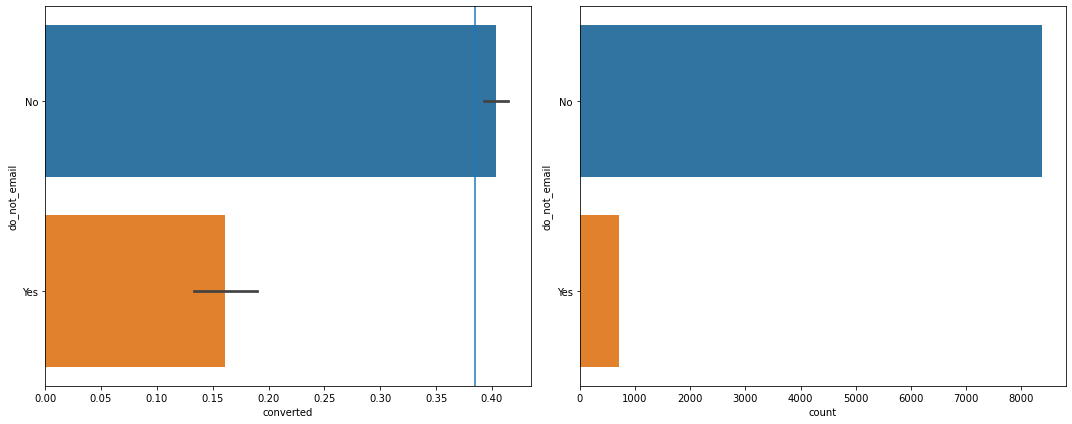

In [42]:
analyse_cat_column_with_converted_column('do_not_email',10)

1. If Do not email is marked then there is a very less chance of conversion

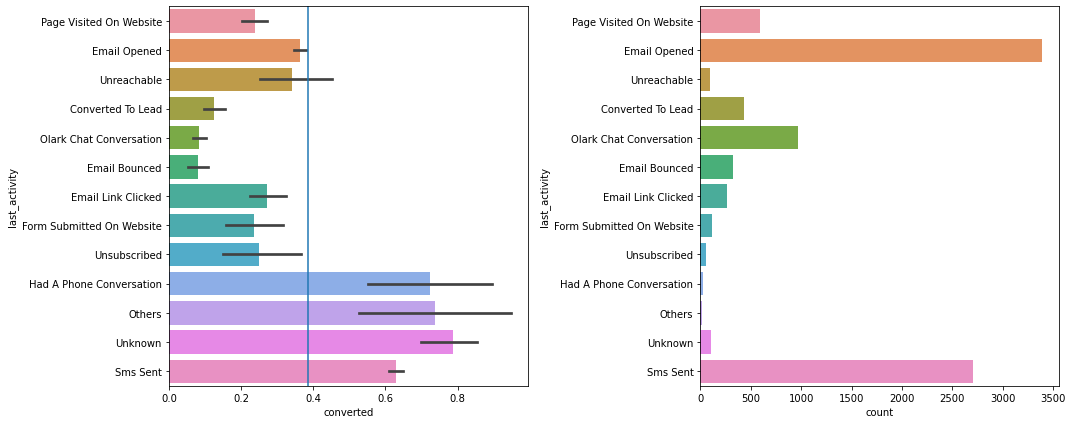

In [43]:
analyse_cat_column_with_converted_column('last_activity',10)

1. If the last activity is an sms sent, then there is high chance of conversion

> Most of the data is Indian so no real comparsion can be made

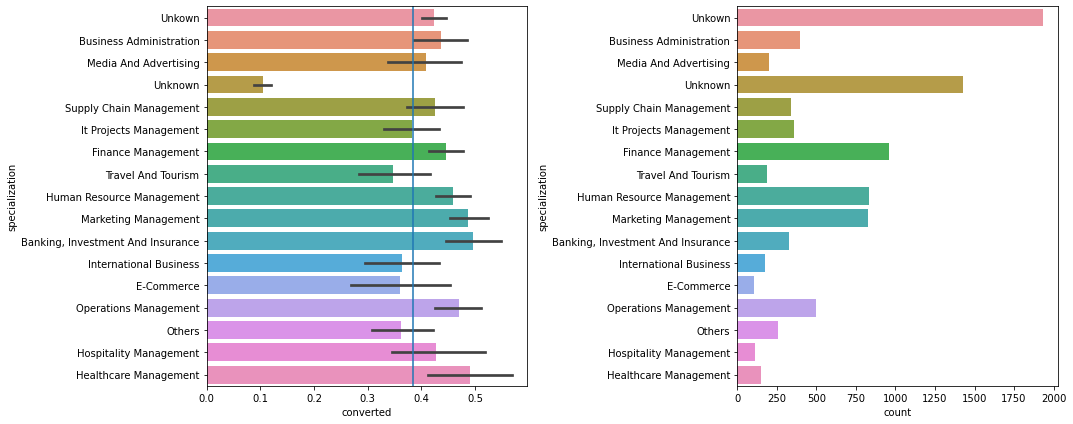

In [44]:
analyse_cat_column_with_converted_column('specialization',100)


> 1. if there is no specialization ie. unknown the conversion rate drops suddenly
> 2. All Management studies have a good conversion rate 

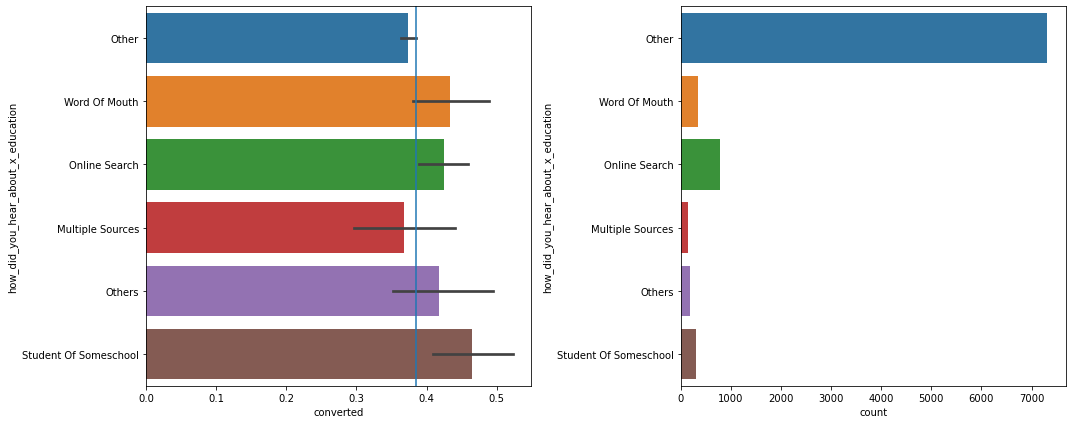

In [45]:
analyse_cat_column_with_converted_column('how_did_you_hear_about_x_education',100)

1. Round above the same performance across inputs

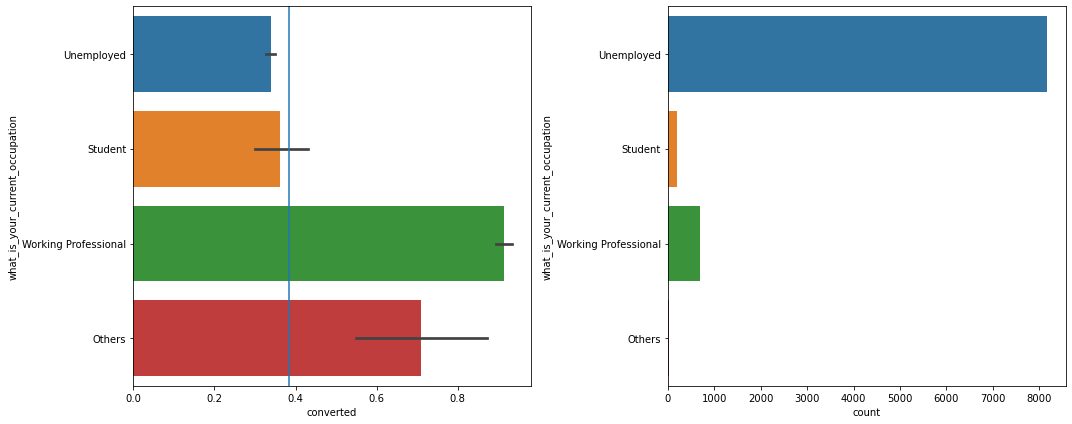

In [46]:
analyse_cat_column_with_converted_column('what_is_your_current_occupation',100)

> Work Professionals are a good bracket to target

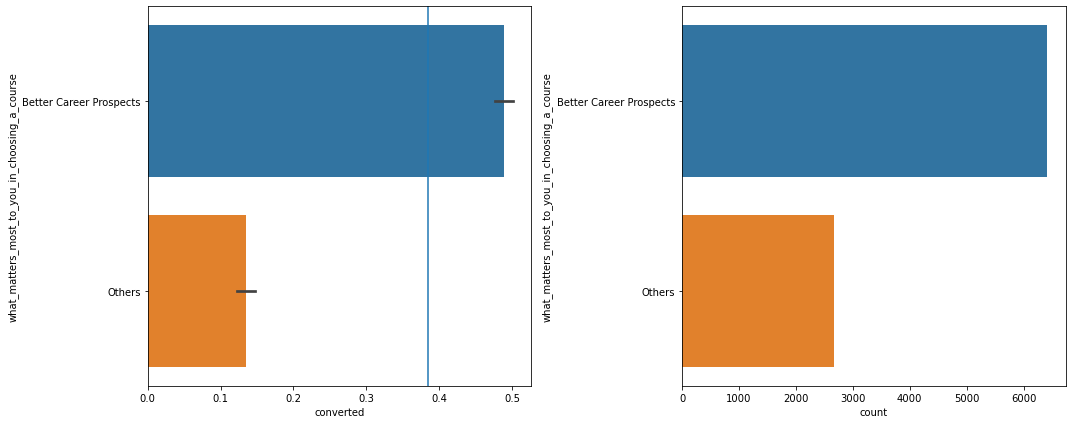

In [47]:
analyse_cat_column_with_converted_column('what_matters_most_to_you_in_choosing_a_course',10)

> Better Career Prospects or some value is better for conversion

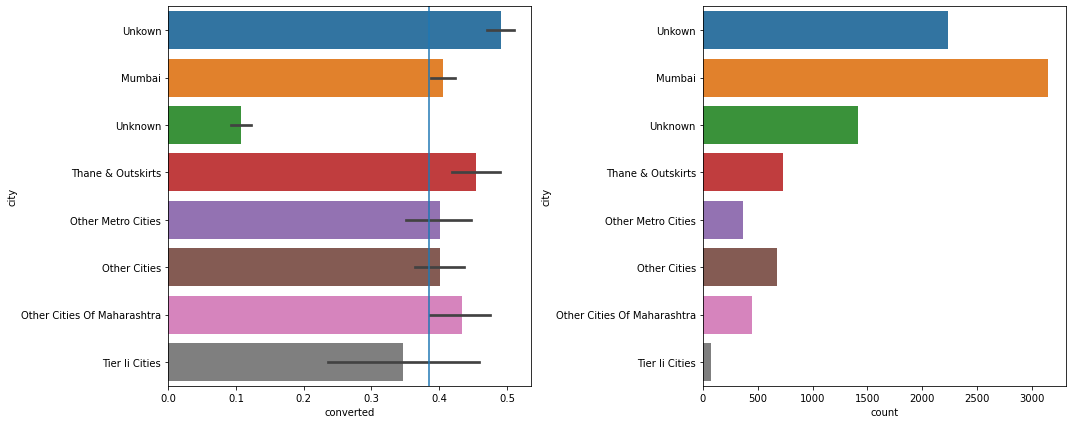

In [48]:
analyse_cat_column_with_converted_column('city',10)

> When city is not mentioned the conversion rate drops

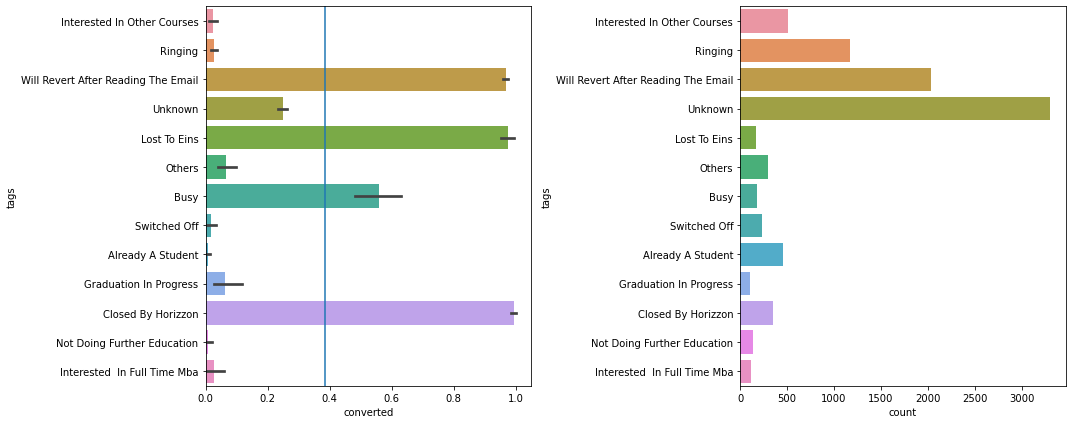

In [49]:
analyse_cat_column_with_converted_column('tags',100)

> 1. will revert after reading the email
> 2. Lost to Eins
> 3. Closed by Horizzon have a almost perfect score

In [50]:
df = df.drop(columns='tags')

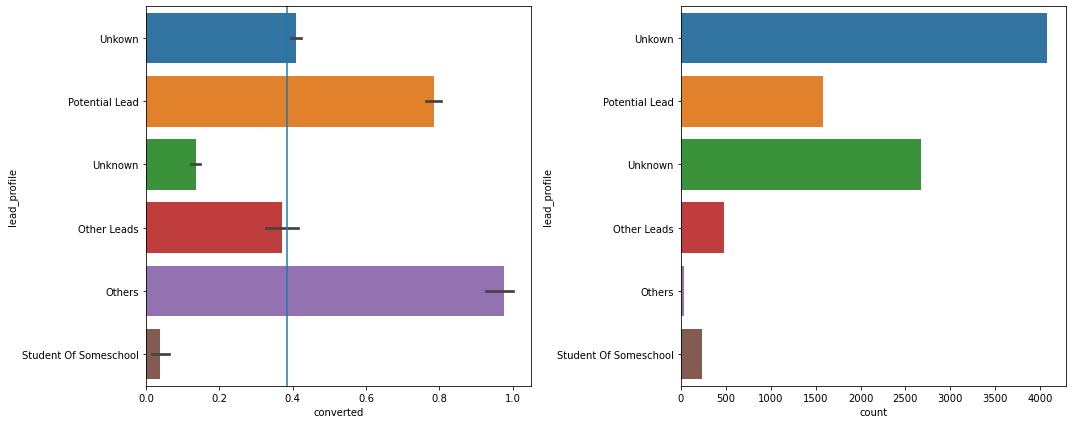

In [51]:
analyse_cat_column_with_converted_column('lead_profile',100)

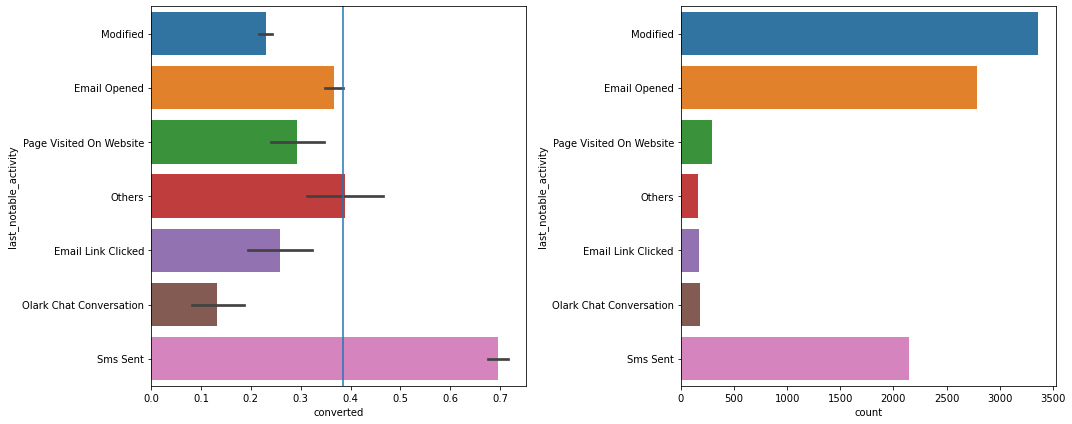

In [52]:
analyse_cat_column_with_converted_column('last_notable_activity',100)

> 1. Sms Sent is a good indicator

### Numerical Analysis

In [53]:
df = df.convert_dtypes()

In [54]:
df.dtypes

prospect_id                                       string
lead_number                                        Int64
lead_origin                                       string
lead_source                                       string
do_not_email                                      string
converted                                          Int64
totalvisits                                        Int64
total_time_spent_on_website                        Int64
page_views_per_visit                             Float64
last_activity                                     string
specialization                                    string
how_did_you_hear_about_x_education                string
what_is_your_current_occupation                   string
what_matters_most_to_you_in_choosing_a_course     string
lead_profile                                      string
city                                              string
a_free_copy_of_mastering_the_interview            string
last_notable_activity          

In [55]:
df.describe([0.99])

,lead_number,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000
mean,617197.434763,0.384488,3.140924,484.243784,2.277908
std,23392.354280,0.486501,2.881884,547.243973,1.883003
min,579533.000000,0.000000,0.000000,0.000000,0.000000
50%,615557.000000,0.000000,3.000000,246.000000,2.000000
99%,659583.980000,1.000000,13.000000,1840.110000,8.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


<AxesSubplot:xlabel='converted', ylabel='totalvisits'>

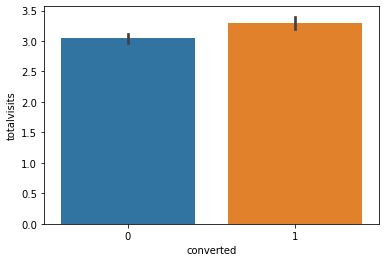

In [56]:
sns.barplot(x=df.converted, y=df.totalvisits)

<AxesSubplot:xlabel='converted', ylabel='total_time_spent_on_website'>

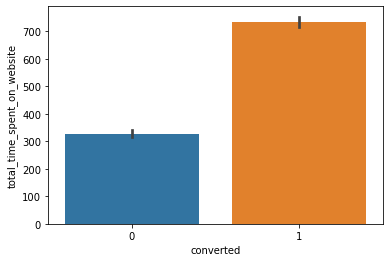

In [57]:
sns.barplot(x=df.converted, y=df.total_time_spent_on_website)

<AxesSubplot:xlabel='converted', ylabel='page_views_per_visit'>

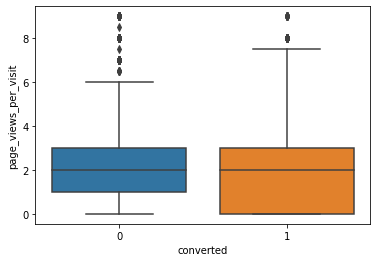

In [58]:
sns.boxplot(x=df.converted, y=df.page_views_per_visit)

<AxesSubplot:>

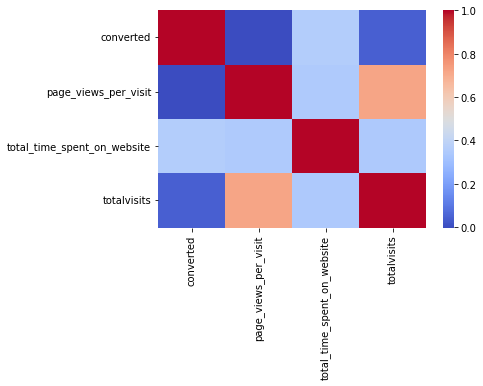

In [59]:
sns.heatmap(df[['converted','page_views_per_visit','total_time_spent_on_website','totalvisits']].corr(),cmap='coolwarm')

## One Hot Encoding Data

In [60]:
df  = df.drop(columns=['prospect_id','lead_number'])

In [61]:
cat_df = pd.DataFrame()
for column in df.select_dtypes('string').columns:
    cat_df = pd.concat([cat_df,pd.get_dummies(df[column], prefix=column)],axis=1)
cat_df.head()

,lead_origin_Api,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Bing,lead_source_Blog,lead_source_Click2Call,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Nc_Edm,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay Per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Testone,lead_source_Unknown,lead_source_Welearn,lead_source_Welearnblog_Home,lead_source_Welingak Website,lead_source_Youtubechannel,do_not_email_No,do_not_email_Yes,last_activity_Approached Upfront,last_activity_Converted To Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted On Website,last_activity_Had A Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited On Website,last_activity_Resubscribed To Emails,last_activity_Sms Sent,last_activity_Unknown,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View In Browser Link Clicked,last_activity_Visited Booth In Tradeshow,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-Commerce,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_International Business,specialization_It Projects Management,specialization_Marketing Management,specialization_Media And Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural And Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel And Tourism,specialization_Unknown,specialization_Unkown,how_did_you_hear_about_x_education_Advertisements,how_did_you_hear_about_x_education_Email,how_did_you_hear_about_x_education_Multiple Sources,how_did_you_hear_about_x_education_Online Search,how_did_you_hear_about_x_education_Other,how_did_you_hear_about_x_education_Sms,how_did_you_hear_about_x_education_Social Media,how_did_you_hear_about_x_education_Student Of Someschool,how_did_you_hear_about_x_education_Word Of Mouth,what_is_your_current_occupation_Businessman,what_is_your_current_occupation_Housewife,what_is_your_current_occupation_Other,what_is_your_current_occupation_Student,what_is_your_current_occupation_Unemployed,what_is_your_current_occupation_Working Professional,what_matters_most_to_you_in_choosing_a_course_Better Career Prospects,what_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,what_matters_most_to_you_in_choosing_a_course_Other,what_matters_most_to_you_in_choosing_a_course_Others,lead_profile_Dual Specialization Student,lead_profile_Lateral Student,lead_profile_Other Leads,lead_profile_Potential Lead,lead_profile_Student Of Someschool,lead_profile_Unknown,lead_profile_Unkown,city_Mumbai,city_Other Cities,city_Other Cities Of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier Ii Cities,city_Unknown,city_Unkown,a_free_copy_of_mastering_the_interview_No,a_free_copy_of_mastering_the_interview_Yes,last_notable_activity_Approached Upfront,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Form Submitted On Website,last_notable_activity_Had A Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited On Website,last_notable_activity_Resubscribed To Emails,last_notable_activity_Sms Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View In Browser Link Clicked
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [62]:
df = df.drop(columns=df.select_dtypes('string').columns)
df = pd.concat([df,cat_df],axis=1)
df.head()

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_Api,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Bing,lead_source_Blog,lead_source_Click2Call,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Nc_Edm,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay Per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Testone,lead_source_Unknown,lead_source_Welearn,lead_source_Welearnblog_Home,lead_source_Welingak Website,lead_source_Youtubechannel,do_not_email_No,do_not_email_Yes,last_activity_Approached Upfront,last_activity_Converted To Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted On Website,last_activity_Had A Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited On Website,last_activity_Resubscribed To Emails,last_activity_Sms Sent,last_activity_Unknown,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View In Browser Link Clicked,last_activity_Visited Booth In Tradeshow,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-Commerce,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_International Business,specialization_It Projects Management,specialization_Marketing Management,specialization_Media And Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural And Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel And Tourism,specialization_Unknown,specialization_Unkown,how_did_you_hear_about_x_education_Advertisements,how_did_you_hear_about_x_education_Email,how_did_you_hear_about_x_education_Multiple Sources,how_did_you_hear_about_x_education_Online Search,how_did_you_hear_about_x_education_Other,how_did_you_hear_about_x_education_Sms,how_did_you_hear_about_x_education_Social Media,how_did_you_hear_about_x_education_Student Of Someschool,how_did_you_hear_about_x_education_Word Of Mouth,what_is_your_current_occupation_Businessman,what_is_your_current_occupation_Housewife,what_is_your_current_occupation_Other,what_is_your_current_occupation_Student,what_is_your_current_occupation_Unemployed,what_is_your_current_occupation_Working Professional,what_matters_most_to_you_in_choosing_a_course_Better Career Prospects,what_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,what_matters_most_to_you_in_choosing_a_course_Other,what_matters_most_to_you_in_choosing_a_course_Others,lead_profile_Dual Specialization Student,lead_profile_Lateral Student,lead_profile_Other Leads,lead_profile_Potential Lead,lead_profile_Student Of Someschool,lead_profile_Unknown,lead_profile_Unkown,city_Mumbai,city_Other Cities,city_Other Cities Of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier Ii Cities,city_Unknown,city_Unkown,a_free_copy_of_mastering_the_interview_No,a_free_copy_of_mastering_the_interview_Yes,last_notable_activity_Approached Upfront,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Form Submitted On Website,last_notable_activity_Had A Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited On Website,last_notable_activity_Resubscribed To Emails,last_notable_activity_Sms Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity

### Standardising Numerical Data

In [63]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['page_views_per_visit','total_time_spent_on_website','totalvisits']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Seperating Train and Test Data

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='converted'),df['converted'],train_size=0.8)
print('Xtrain : ',X_train.shape)
print('Y_train : ',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)


Xtrain :  (7272, 121)
Y_train :  (7272,)
X_test :  (1818, 121)
y_test :  (1818,)


### RFE

In [65]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [66]:
lr = LogisticRegression(max_iter=500)
rfe = RFE(lr, n_features_to_select=20)
rfe.fit(X_train, y_train.astype('int'))

cols = X_train.columns[rfe.support_]

In [67]:
pd.DataFrame(data=zip(df.columns,rfe.support_))

,0,1
0,converted,False
1,totalvisits,True
2,total_time_spent_on_website,False
3,page_views_per_visit,False
4,lead_origin_Api,False
...,...,...
116,last_notable_activity_Page Visited On Website,False
117,last_notable_activity_Resubscribed To Emails,False
118,last_notable_activity_Sms Sent,True
119,last_notable_activity_Unreachable,False


In [68]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## Building Model 1 ( OLS + VIF)

In [69]:
cols

Index(['total_time_spent_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Welingak Website',
       'do_not_email_Yes', 'last_activity_Approached Upfront',
       'last_activity_Had A Phone Conversation',
       'last_activity_Olark Chat Conversation', 'last_activity_Sms Sent',
       'last_activity_Unsubscribed',
       'what_is_your_current_occupation_Housewife',
       'what_is_your_current_occupation_Working Professional',
       'what_matters_most_to_you_in_choosing_a_course_Better Career Prospects',
       'lead_profile_Dual Specialization Student',
       'lead_profile_Lateral Student', 'lead_profile_Potential Lead',
       'lead_profile_Student Of Someschool',
       'last_notable_activity_Had A Phone Conversation',
       'last_notable_activity_Modified', 'last_notable_activity_Unreachable'],
      dtype='object')

In [70]:

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7251
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2761.5
Date:                Sun, 26 Feb 2023   Deviance:                       5523.0
Time:                        23:01:31   Pearson chi2:                 7.45e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4364
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

## Building Model 2( OLS + VIF)

In [71]:
cols = cols.drop('last_activity_Approached Upfront',errors='ignore')


X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7252
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2765.0
Date:                Sun, 26 Feb 2023   Deviance:                       5530.0
Time:                        23:01:32   Pearson chi2:                 7.46e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4358
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

## Building Model 3 ( OLS + VIF)

In [72]:
cols = cols.drop('what_is_your_current_occupation_Housewife',errors='ignore')

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7253
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2770.5
Date:                Sun, 26 Feb 2023   Deviance:                       5541.1
Time:                        23:01:33   Pearson chi2:                 7.47e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4350
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

## Building Model 4 ( OLS + VIF)

In [73]:
cols = cols.drop('lead_source_Welingak Website',errors='ignore')

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7254
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2784.0
Date:                Sun, 26 Feb 2023   Deviance:                       5568.0
Time:                        23:01:34   Pearson chi2:                 7.78e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4329
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

## Predicting on Train Data

In [74]:
predictions = res.predict(X_train_sm)
y_train_prob = pd.DataFrame(data={'original':y_train.astype('int'),'predicted_prob':predictions})


## Deciding Cutoff

In [75]:
from dataclasses import dataclass
@dataclass
class score:
    cutoff:float
    accuracy:int
    specificity:int
    sensitivity:int
    precision:int

scores = []
for i in np.linspace(0,1,21):
    y_train_prob['predicted'] = y_train_prob['predicted_prob'].apply(lambda x : 1 if x>i  else 0)
    cm = confusion_matrix(y_train_prob.original, y_train_prob.predicted)
    tp = cm[0,0]
    tn = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    sensitivity = (tp)/(tp+fn)
    spec = (tn)/(tn+fp)
    precision = (tp)/(tp+fp)
    scores.append(score(i,accuracy,spec, sensitivity,precision))
scores_df = pd.DataFrame(scores)

C:\Users\Rahul_Patil2\AppData\Local\Temp\ipykernel_1192\3542567667.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity = (tp)/(tp+fn)
C:\Users\Rahul_Patil2\AppData\Local\Temp\ipykernel_1192\3542567667.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
  spec = (tn)/(tn+fp)


In [76]:
scores_df

,cutoff,accuracy,specificity,sensitivity,precision
0,0.00,0.384901,0.384901,NaN,0.000000
1,0.05,0.534516,0.452311,0.982270,0.247708
2,0.10,0.661579,0.533021,0.967038,0.465683
3,0.15,0.727860,0.590748,0.952796,0.586631
4,0.20,0.785341,0.657667,0.935146,0.699531
5,0.25,0.801705,0.682933,0.925344,0.737089
6,0.30,0.811194,0.702903,0.912453,0.766600
7,0.35,0.822057,0.739573,0.884774,0.817125
8,0.40,0.824395,0.763687,0.864341,0.847530
9,0.45,0.826595,0.785874,0.850502,0.871227


## Accuracy-Sensitivity-Specificity Curve

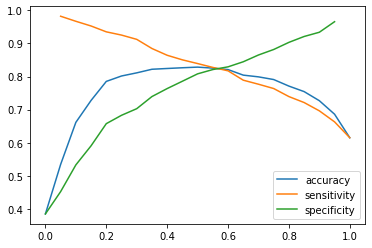

In [77]:
plt.plot(scores_df.cutoff, scores_df.accuracy, label='accuracy')
plt.plot(scores_df.cutoff, scores_df.sensitivity, label='sensitivity')
plt.plot(scores_df.cutoff, scores_df.specificity, label='specificity')
plt.legend()

## Train Data Results

In [78]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

predictions = res.predict(X_train_sm)
y_train_prob = pd.DataFrame(data={'original':y_train.astype('int'),'predicted_prob':predictions})

y_train_prob['predicted'] = y_train_prob['predicted_prob'].apply(lambda x : 1 if x>0.55  else 0)

cm   = confusion_matrix(y_pred=y_train_prob.predicted,y_true=y_train_prob.original)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = (tp)/(tp+fn)
spec = (tn)/(tn+fp)
precision = (tp)/(tp+fp)
print("Accuracy : ",accuracy)
print("Sensitivity : ",sensitivity)
print("Specificity : ",spec)
print("Precision : ", precision)

Accuracy :  0.8254950495049505
Sensitivity :  0.8276073619631902
Specificity :  0.8211586901763224
Precision :  0.9047619047619048


## ROC Curve

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_prob.original, y_train_prob.predicted_prob, drop_intermediate = False )

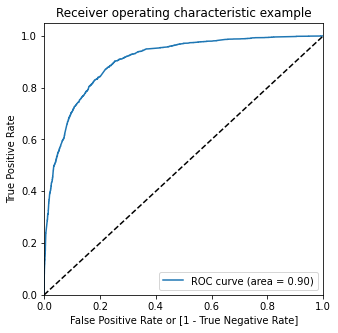

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_train_prob.original, y_train_prob.predicted_prob)

## Precision Recall Curve

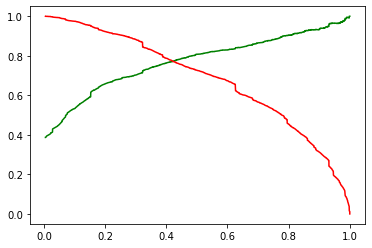

In [81]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_prob.original, y_train_prob.predicted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Predicting on Test Data

In [82]:
X_test_sm = sm.add_constant(X_test)
test_predictions = res.predict(X_test_sm[X_train_sm.columns])


In [83]:
y_test = pd.DataFrame(zip(y_test, test_predictions), columns=['y_test','y_test_prob'])

In [84]:
y_test['predicted'] = y_test['y_test_prob'].apply(lambda x : 1 if x>0.6  else 0)

In [85]:
cm   = confusion_matrix(y_pred=y_test.predicted,y_true=y_test.y_test)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = (tp)/(tp+fn)
spec = (tn)/(tn+fp)
precision = (tp)/(tp+fp)
print("Accuracy : ",accuracy)
print("Sensitivity : ",sensitivity)
print("Specificity : ",spec)
print("Precision : ", precision)

Accuracy :  0.834983498349835
Sensitivity :  0.8277511961722488
Specificity :  0.851063829787234
Precision :  0.9251336898395722


In [86]:
column_importance = pd.DataFrame(res.params).reset_index().rename(columns={
    'index':'column_name',
    0:"importance"
})

column_importance[
    'abs_importance'
] = np.abs(column_importance.importance)
column_importance.sort_values('abs_importance')

,column_name,importance,abs_importance
5,last_activity_Had A Phone Conversation,0.398447,0.398447
16,last_notable_activity_Modified,-0.787307,0.787307
10,what_matters_most_to_you_in_choosing_a_course_...,0.970363,0.970363
8,last_activity_Unsubscribed,1.012124,1.012124
6,last_activity_Olark Chat Conversation,-1.050191,1.050191
1,total_time_spent_on_website,1.077076,1.077076
17,last_notable_activity_Unreachable,1.170960,1.170960
7,last_activity_Sms Sent,1.257114,1.257114
4,do_not_email_Yes,-1.317098,1.317098
3,lead_source_Olark Chat,1.432965,1.432965


# Conclusion : 


<h3><b>Train Data Score:</b></h3> <br>
<b>Accuracy</b> : 82% <br>
<b>Sensitivity</b> (Out of all the converted users, how many we were able to identify) :  81% <br>
<b>Specificity</b> (Out of all the non converted users, how many we were able to identify) : 90% <br>

<h3><b>Test Data Score: </b></h3> <br>
<b>Accuracy</b> : 83% <br>
<b>Sensitivity</b> (Out of all the converted users, how many we were able to identify) :  81% <br>
<b>Specificity</b> (Out of all the non converted users, how many we were able to identify) :85% <br>

